# Mecânica de Locomoção 
# *Veículos Ferroviários*
---
*prof. André Luiz Cunha*

# Codificação

In [46]:
import matplotlib.pyplot as plt
import numpy as np

## Força Tratora

In [47]:
# Traction force funtion
def Ft(P, V, unit='kW', n=0.81):
    '''Ft in kN'''
    k = 3600
    if unit == 'hp':
        k = 2685
    if unit == 'cv':
        k = 2649
    return (n * k * P)/ (V * 1000) #kN

# Maximum Traction force funtion
def Ftmax(Td, f=0.30):
    '''Td in kN'''
    return (Td * f) # kN

## Resistências ao Movimento

In [48]:
'''Funções de Resistencia ao movimento'''
# Rolamento
def Rr(x, G, V, tipo='locomotiva'):
    c1 = 0.65
    c2 = 125
    if tipo=='carga':
        c3 = 0.013
    else:
        c3 = 0.009
        
    return (c1 + (c2 * x)/G + c3 * V) * G / 1000 # [kN]

def Ra(A, V, tipo='locomotiva'):
    if tipo=='locomotiva passageiro':
        ca = 0.031
    elif tipo == 'carga':
        ca = 0.009
    elif tipo == 'passageiro':
        ca = 0.006
    else:
        ca = 0.046
    return ca * A * V * V / 1000 # [kN]

def Rg(G, i):
    if i:
        if return 10 * G * i / 1000 # [kN]
    return 0

def Rc(G, r):
    if r:
        return ((698 * G)/r)/1000 # [kN] 
    return 0

---
# Exemplo

Um trem de carga é composto por __**2 locomotivas diesel-elétrica e 40 vagões graneleiros**__.

|Locomotiva Diesel-elétrica | Vagão Hopper fechado |
| :---: | :----: |
| <img src="http://www.oocities.org/estrada_de_ferro/f-u26c-406.jpg" alt="Locomotiva Diesel-elétrica" width="400"> | <img src="http://www.boqnews.com/wp-content/uploads/2017/06/rumo-logistica.jpg" alt="Vagão Hopper fechado" width="400"> |

### Locomotiva
A locomotiva tem 6 eixos, todos motrizes; seção transversal de 11,5 m²; velocidade mínima de operação contínua (VMOC) de 18 km/h; velocidade máxima de 110 km/h; e eficiência de transmissão $\eta$ = 0,82. Adote o fator de aderência $f$ = 0,30.

Sabendo que $XYZ$ são os três últimos dígitos do número USP, o peso da locomotiva (em kN) é dado por: 
$$G_{loco} = 1300 - 300 \cdot e^{-0,0015 \cdot XYZ}$$

E a potência nominal (em hp) da locomotiva é: 
$$P = 3800 - 600 \cdot e^{-0,XYZ}$$

### Vagões de carga
Os vagões para transporte de grãos têm 4 eixos, seção transversal de 8,5 m² e, quando carregados, o peso bruto total (em kN) pode ser estimado por:
$$G_{vagao} = 700 + 300 \cdot e^{-0,0XYZ}$$

### Perfil do Trecho

O perfil vertical do trecho percorrido pela composição é dado a seguir:

<img src=".\_imgs\lista1-trecho.png" alt="Forças Atuantes" width="800">


In [83]:
'''Locomotive'''
nL = 2
xL = 6 #eixos
AL = 11.5 #m²
GL = 1300 #kN
P = 3800 #hp
efic = 0.82
Vmax = 110 #km/h
Vmoc = 18 #km/h
fad = 0.3

'''Carboose'''
nV = 40
xV = 4
AV = 8.5 #m²
GV = 1000 #kN

'''Profile'''
Ilist = [0, 0.012, -0.003, 0.003, -0.012] #%
r = 0 #m

In [84]:
'Speed vector'
V = np.arange(.1,Vmax+.1,.1)
V = np.concatenate((V, np.array([Vmax])))

'Force vector'
F = Ft(P,V,'hp') * nL
F[F > Ftmax(nL * GL)] = Ftmax(nL * GL)
F[-1] = 0

'Resistance'
R = dict()
for i in Ilist:
    RL = Rr(xL, GL, V, 'locomotiva') + Ra(AL, V, 'locomotiva') + Rg(GL, i*100) + Rc(GL, r)
    RV = Rr(xV, GV, V, 'carga') + Ra(AV, V, 'carga') + Rg(GV, i*100) + Rc(GV, r)
    R[str(i*100)+'%'] = nL * RL + nV * RV

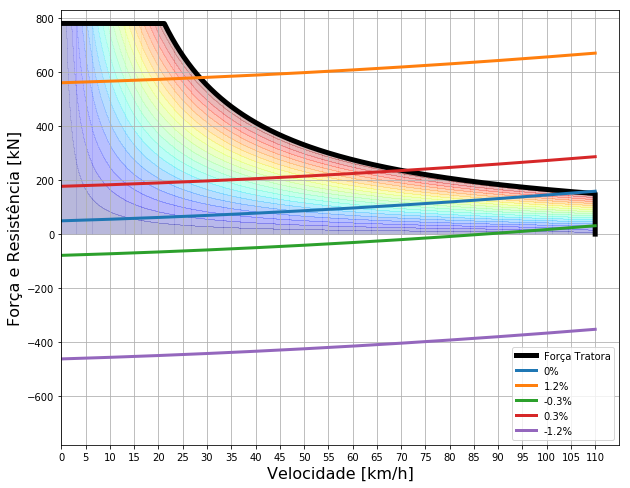

In [95]:
'Power'
Pporc = np.arange(0,1.01,.05)
# Meshgrid
Vm, Pm = np.meshgrid(V,Pporc)
Fm = Ft(nL*P*Pm,Vm,'hp')
Fm[Fm > Ftmax(nL*GL)] = Ftmax(nL*GL)
Fm[:,-1] = 0

'FIGURE'
fig, ax = plt.subplots(figsize=(10,8))

im = ax.pcolormesh(Vm, Fm, Pm,cmap='jet',alpha=0.1)
ax.plot(V,F,label='Força Tratora',linewidth=5,color='black')
for key,value in R.items():
    ax.plot(V,value,label=key,linewidth=3)

ax.grid(True)
ax.axis([0, Vmax+5, -max(F), max(F)+50])

plt.xlabel('Velocidade [km/h]', size=16)
plt.xticks(range(0, Vmax+5,5))
plt.ylabel('Força e Resistência [kN]', size=16)
plt.legend()
plt.show()